## Introduction to the Project
This project will introduce some foundation Machine Learning and Data Science concepts by exploring the problem of heart disease **classification**.

It is intended to be an end-to-end example of what a Data Science and Machine Learning **proof of concept** might look like.

## What we'll end up with

Since we already have a dataset, we'll approach the problem with the following Machine Learning modeling framework.

More specifically, we'll look at the following topics.

* **Exploratory data analysis (EDA)** - the process of reviewing a dataset and finding out more about it.
* **Model training** - create a model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some more important things for prediction?
* **Cross validation** - if we build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use **Pandas**, **Matplotlib**, and **NumPy** for Data Analysis, as well as, **Scikit-Learn** for Machine Learning and modeling tasks.

We'll work through each step and by the end of the notebook, we'll have a handful of models, all of which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy. 

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

## Data Source 
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it, and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

However, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patient's different medical attributes and the dependent variable is whether or not they have heart disease.


### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 


2. sex - (1 = male; 0 = female) 


3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
    
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
    
    
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
    
    
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
    
    
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
        
        
8. thalach - maximum heart rate achieved 


9. exang - exercise induced angina (1 = yes; 0 = no) 


10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
    
    
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
    
    
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
    
    
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
    
    
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

# Perparing the tools
We're going to use NumPy, Pandas, Matplotlib & Seaborn for data analysis and manipulation.

In [1]:
# Import all the needed tools

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load data 

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
# Rows & Columns
df.shape

(303, 14)

# Data Explortation (exploratory data analysis or EDA)

The goal here is to find out more about the data & become a subject amtter export on the dataset you're working on.

1. What questions(s) are you trying so solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's fund out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

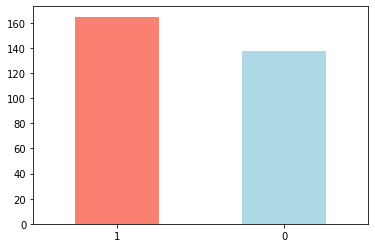

In [7]:
# Visualization of the above counts
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xticks(rotation=360)
plt.show()

In [8]:
# Get some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Further description of our dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to Sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare Target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


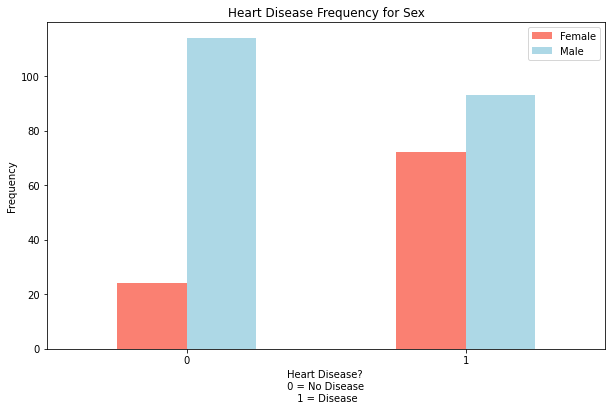

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Heart Disease? \n 0 = No Disease \n 1 = Disease")
plt.xticks(rotation=360)
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.show()

### Age vs. max heart rate for Heart Disease 

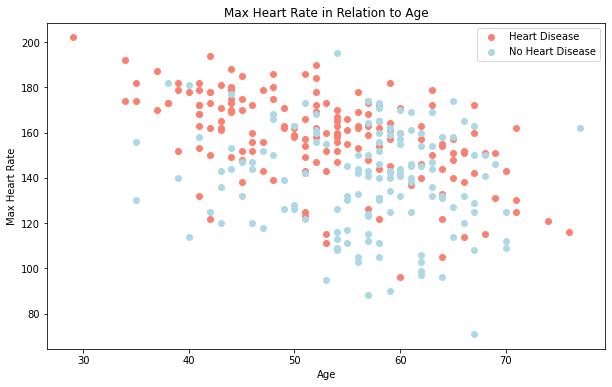

In [14]:
# Create another figure
fig,ax = plt.subplots(figsize=(10, 6))

# Scatter with positive examples
pos_examples = ax.scatter(df.age[df.target==1], 
                          df.thalach[df.target == 1], 
                          color="salmon", label="Heart Disease")

# Scatter with negative examples
neg_examples = ax.scatter(df.age[df.target==0], 
                          df.thalach[df.target == 0], 
                          color="lightblue", label="No Heart Disease")

# Get mean line
mean = df["thalach"].mean()
mean_line = ax.plot()

# Customize the plot
plt.title("Max Heart Rate in Relation to Age")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()
plt.show()

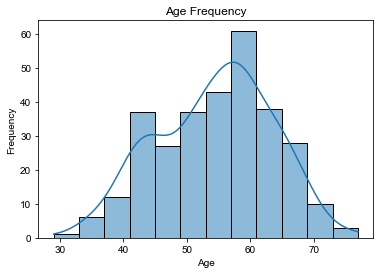

In [15]:
# Check the distribution of the age column with a histogram
sns.histplot(df["age"], kde=True)
plt.style.use("seaborn-darkgrid")


# Customize the plot
plt.title("Age Frequency")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Heart Disease Frequency  per Chest Pain Type

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


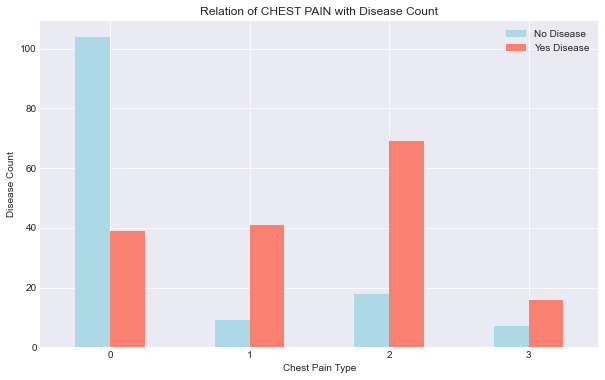

In [17]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])

# Customization
plt.title("Relation of CHEST PAIN with Disease Count")
plt.xlabel("Chest Pain Type")
plt.ylabel("Disease Count")
plt.xticks(rotation=360)
plt.legend(["No Disease", "Yes Disease"])
plt.show()

In [18]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0


In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


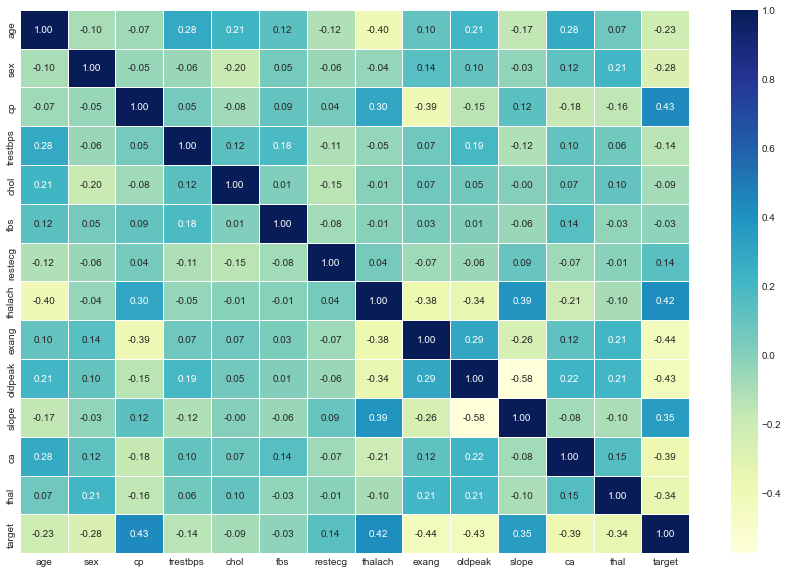

In [20]:
# Let's make our correlation matrix a bit prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

# Plot
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu", )

# Customization


# Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split the data into X & y
X = df.drop("target", axis=1)
y = df["target"]

In [23]:
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [24]:
pd.DataFrame(y).head(3)

,target
0,1
1,1
2,1


In [25]:
# Create training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
pd.DataFrame(y_train)

,target
132,1
202,0
196,0
75,1
176,0
...,...
188,0
71,1
106,1
270,0


In [28]:
len(X_train), len(y_train)

(242, 242)

In [29]:
len(X_test), len(y_test)

(61, 61)

Now we've split our data into train & test sets, it's time to find an appropriate machine learning model.

We'll train it on the train set and it'll (ML model) will find patterns within them.

We'll test it on the test set.

We are going to try 3 different machine learning models:
* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [30]:
# Put models in a dictionary
models = {
        "Logistic Regression" : LogisticRegression(max_iter=10000),
        "KNN" : KNeighborsClassifier(),
        "Random Forest" : RandomForestClassifier()
         }

# Create a function to train & score the data
def fit_and_score(models, X, y, X_train, X_test, y_train, y_test, random_seed=42):
    global model_accuracy, model_cross_validation
    """
    Fits & Scores given machine learning models
    
    ** Parameters **
    models: Model Dictionary
    X: The X Dataset Split (NO labels)
    y: The y Dataset Split (LABELS)
    X_train: Training Data (no labels)
    X_test: Test Data (no labels)
    y_train: Training Data Labels
    y_test: Test Data Labels
    random_seed: Random Seed (default 42)
    """
    
    # Random Seed
    np.random.seed(random_seed)
    
    # Create a dictionary to keep model scores
    model_accuracy = {}
    model_cross_validation = {}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Append the score to the model score dictionary
        model_accuracy[name] = model.score(X_test, y_test)
        
        # Append the mean of the cross-validation scores to dictionary
        cvs = cross_val_score(model, X, y, cv=5)
        model_cross_validation[name] = np.mean(cvs)
    
    return model_accuracy, model_cross_validation

In [31]:
fit_and_score(models, X, y, X_train, X_test, y_train, y_test)

({'Logistic Regression': 0.8852459016393442,
  'KNN': 0.6885245901639344,
  'Random Forest': 0.8360655737704918},
 {'Logistic Regression': 0.8282513661202187,
  'KNN': 0.643879781420765,
  'Random Forest': 0.8214754098360656})

### Model Comparison

In [32]:
accuracy_scores = pd.DataFrame(model_accuracy, index=["Accuracy"])
cross_val_scores = pd.DataFrame(model_cross_validation, index=["Cross Validated Scores"])

In [33]:
accuracy_scores

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


In [34]:
cross_val_scores

,Logistic Regression,KNN,Random Forest
Cross Validated Scores,0.828251,0.64388,0.821475


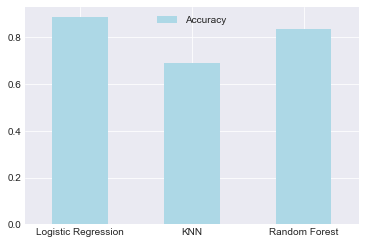

In [35]:
accuracy_scores.T.plot.bar(figsize=(6, 4), color=["Lightblue"])
plt.xticks(rotation=360)
plt.show()

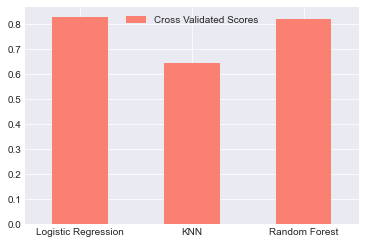

In [36]:
cross_val_scores.T.plot.bar(figsize=(6, 4), color=["Salmon"])
plt.xticks(rotation=360)
plt.show()

Now we've got a baseline model...and we know that a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:
* Hyperparamter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F-1 Score
* Classification Report
* ROC Curve
* Area Under Curve (AUC)